<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('movie_data.csv',encoding='utf-8')

In [ ]:
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


# bagging model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
count=CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])
bag=count.fit_transform(docs)


In [ ]:
count.vocabulary_

{'the': 6,
 'sun': 4,
 'is': 1,
 'shining': 3,
 'weather': 8,
 'sweet': 5,
 'and': 0,
 'one': 2,
 'two': 7}

In [ ]:
bag.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1],
       [2, 3, 2, 1, 1, 1, 2, 1, 1]])

These value in these feature vector are call raw term frequency. tf(t,d), t: number of time the term (t) occur in document d

* N-gram model:
1-gram model: each item or token represent 1 word.


#accessing word relevancy vie term frequency inverse document frequency


Word that appear commonly in many sentence. which not valuable to discriminated. the method called term frequency, inverse document frequency (tf-idf) use to **downweight** that word in feature vector.
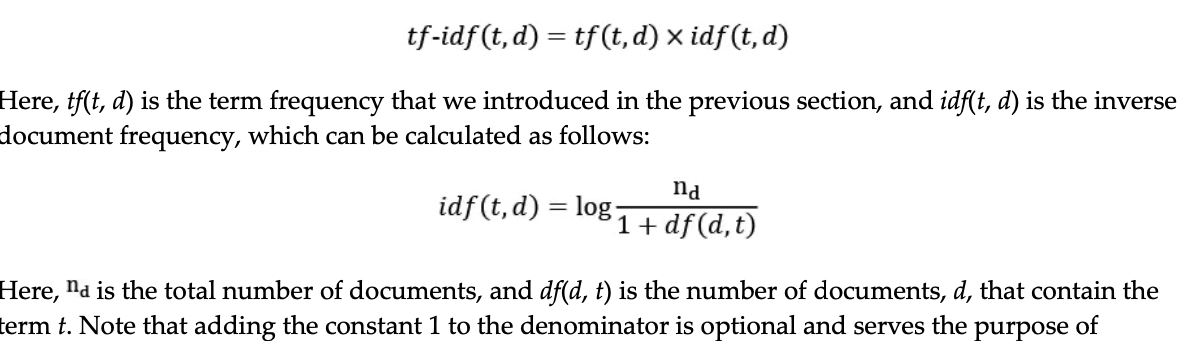

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf= TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
np.set_printoptions(precision=2)
u=tfidf.fit_transform(count.fit_transform(docs)).toarray()
u

array([[0.  , 0.43, 0.  , 0.56, 0.56, 0.  , 0.43, 0.  , 0.  ],
       [0.  , 0.43, 0.  , 0.  , 0.  , 0.56, 0.43, 0.  , 0.56],
       [0.5 , 0.45, 0.5 , 0.19, 0.19, 0.19, 0.3 , 0.25, 0.19]])

In [ ]:
count.vocabulary_

{'the': 6,
 'sun': 4,
 'is': 1,
 'shining': 3,
 'weather': 8,
 'sweet': 5,
 'and': 0,
 'one': 2,
 'two': 7}

#Cleaning text data

In [ ]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

contain HTML markup.

In [ ]:
import re
def processor(text):
  text=re.sub('<[^>]*>','',text)
  emoticons=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
  text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
  return text

In [ ]:
processor(df.loc[0,'review'][-50:])

'is seven title brazil not available'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
df['review']=df['review'].apply(processor)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]
tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [ ]:
def tokenizer(text):
    return text.split()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)

In [ ]:
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [ ]:
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]
pipeline=Pipeline([('vect',tfidf),('clf',LogisticRegression(random_state=0,solver='liblinear'))])

gs=GridSearchCV(estimator=pipeline,cv=5,n_jobs=1,scoring='accuracy',verbose=2,param_grid=param_grid)
gs.fit(X_train,y_train)

# Working with bigger data – online algorithms and out-of-core learning

ưe will use partial-fit to fit 1 example at a time

In [ ]:
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# The `stop` is defined as earlier in this chapter
# Added it here for convenience, so that this section
# can be run as standalone without executing prior code
# in the directory
stop = stopwords.words('english')


def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized


def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)  # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
next(stream_docs(path='movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

In [ ]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)
clf = SGDClassifier(loss='log', random_state=1)


doc_stream = stream_docs(path='movie_data.csv')

In [ ]:
!pip install pyprind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyprind
pbar = pyprind.ProgBar(45)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:57


In [ ]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))

Accuracy: 0.868


In [ ]:
clf = clf.partial_fit(X_test, y_test)

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(loss='log', random_state=1)>

# Topic modeling with Latent Dirichlet Allocation

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df= pd.read_csv('movie_data.csv',encoding='utf-8')
count=CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X=count.fit_transform(df['review'].values)
# max_df=.1 mean exclude work that occur too frequently acrros docs. 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda= LatentDirichletAllocation(n_components=10,random_state=123,learning_method='batch')
X_topics=lda.fit_transform(X)

In [ ]:
n_top_word=5
k=lda.components_
feature_name=count.get_feature_names()
feature_name[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '100', '11', '12', '13', '13th', '14', '15', '16']

In [ ]:
for top_idx, topic in enumerate(lda.components_):
  print('Topic ',top_idx+1)
  print("  ".join(feature_name[i] for i in topic.argsort()[:-n_top_word-1:-1]))


Topic  1
worst  minutes  awful  script  stupid
Topic  2
family  mother  father  children  girl
Topic  3
american  war  dvd  music  tv
Topic  4
human  audience  cinema  art  sense
Topic  5
police  guy  car  dead  murder
Topic  6
horror  house  sex  girl  woman
Topic  7
role  performance  comedy  actor  performances
Topic  8
series  episode  war  episodes  tv
Topic  9
book  version  original  read  novel
Topic  10
action  fight  guy  guys  cool


In [ ]:
k[0].shape

(5000,)

In [ ]:
X_topics.shape
# 50000 example, each example have 10 col, represent probs that topic appear

(50000, 10)

In [ ]:
horror=X_topics[:,5].argsort()[::-1]
# select docs have highest in horror probs
print(df['review'].loc[horror[1]])

Okay, what the hell kind of TRASH have I been watching now? "The Witches' Mountain" has got to be one of the most incoherent and insane Spanish exploitation flicks ever and yet, at the same time, it's also strangely compelling. There's absolutely nothing that makes sense here and I even doubt there ever was a script to work with, but somehow I couldn't turn it off. The scratching your head with confusion starts right away, with an opening sequence about an angry little girl that killed her mother's cat. So you think this film revolves on children possessed by evil forces? Heck no, because after this intro, the girl and her wickedness simply aren't mentioned anymore. Then cut to a guy, with the most impressively trimmed mustache you'll ever see, who breaks up with his girlfriend in a rather unsubtle way. When she asks him to spend his vacation with her, he promptly phones his employer requesting him any type of assignment! Great move. The movie finally starts now, as he travels to an is

# save model

In [ ]:
import pickle
import os
dest = os.path.join('movieclassifier', 'pkl_objects')
dest

'movieclassifier/pkl_objects'

In [ ]:
if not os.path.exists(dest):
  os.makedirs(dest)

In [ ]:
pickle.dump(stop,open(os.path.join(dest, 'stopwords.pkl'), 'wb'),protocol=4)
pickle.dump(clf,open(os.path.join(dest, 'classifier.pkl'), 'wb'),protocol=4)